In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

mat = scipy.io.loadmat('ex7data2.mat')
X = mat['X']
del mat 

Text(0, 0.5, 'Y')

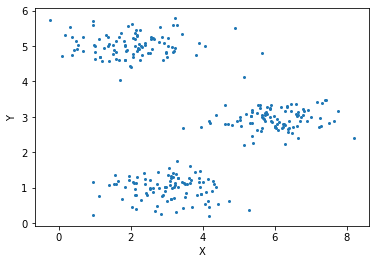

In [2]:
plt.scatter(X[:,0],X[:,1],s=4)
plt.xlabel('X')
plt.ylabel('Y')

In [3]:
def closest_cluster(X_data,c,nx=False,error_out=False):
    m = X_data.shape[0]
    if np.any(nx) == False:
        nx = c.shape[0]
    range_list = np.zeros((m,nx))
    for i in range(nx):
        range_list[:,i] = np.sum((X_data-c[i,:])**2,axis=1)
    if error_out:
        return np.sum(range_list),np.argmin(range_list,axis=1)
    else:
        return np.argmin(range_list,axis=1)
    
def newmeans(X_data,y_data,nx):
    center_list  = np.zeros((nx,2))
    for i in range(nx):
        center_list[i,:] = np.mean(X_data[y_data==i],axis=0)
    return center_list

In [6]:
def J_k_mean(X_data,c,nx):
    err = 0
    for i in range(nx):
        err += np.sum((X_data[y==i]-c[i,:])**2)
    return err

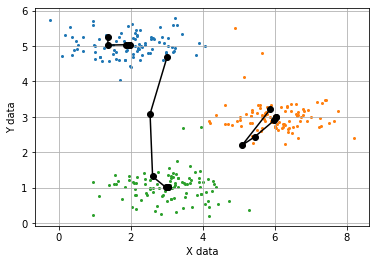

In [9]:
number_of_centroid = 3
random_int = np.random.randint(0,X.shape[0],number_of_centroid)
center_list = []
center_init = X[random_int[:],:]
center_list.append(center_init)
error0 = 1e5
while True:
    y = closest_cluster(X,center_init)
    center_init = newmeans(X,y,number_of_centroid)
    center_list.append(center_init)
    error1 = J_k_mean(X,center_init,number_of_centroid)
    if np.average(np.abs((error0-error1)/error0)) < 1e-2:
        break
    else:
        error0 = error1
def plot_k_mean(X,y,number_of_centroid,center_list_array):
    for i in range(number_of_centroid):
        plt.scatter(X[y==i][:,0],X[y==i][:,1],s=4)
        plt.plot(center_list_array[:,i,0],center_list_array[:,i,1],'-o',color='k')
    plt.xlabel('X data')
    plt.ylabel('Y data')
    plt.grid()
plot_k_mean(X,y,number_of_centroid,np.array(center_list))


c:\Users\chand\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\chand\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


Using elbow method, the K-means is choosen as 3


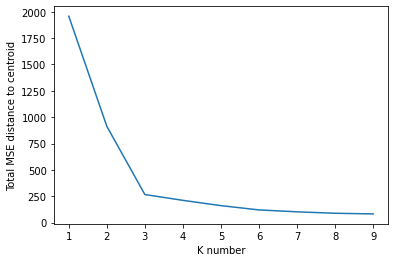

In [11]:
K_num_max = 10
J = np.zeros(K_num_max)
for K_num in range(1,K_num_max):
    for testing_num in range(10):
        number_of_centroid = K_num
        random_int = np.random.randint(0,X.shape[0],number_of_centroid)
        center_init = X[random_int[:],:]
        for i in range(50): 
            y = closest_cluster(X,center_init)
            center_init = newmeans(X,y,number_of_centroid)
        ax = J_k_mean(X,center_init,number_of_centroid)
        if J[K_num]==0 or J[K_num]>ax:
            J[K_num] = ax

plt.plot(list(range(1,J.shape[0])),J[1:])
plt.xlabel('K number')
plt.ylabel('Total MSE distance to centroid')
print('Using elbow method, the K-means is choosen as 3')